In [5]:
import pandas as pd

pd.options.display.max_rows = None
pd.options.display.max_columns = None

datafile = "2022-train-v2.csv"
data = pd.read_csv(datafile)

The cell with 0 value is the same as NaN.

In [6]:
data.replace(0, None, inplace=True)
data.isna().sum()

sensor_point5_i_value       0
sensor_point6_i_value       0
sensor_point7_i_value       0
sensor_point8_i_value       0
sensor_point9_i_value       0
sensor_point10_i_value      0
clean_temp                  0
clean_ec                    0
clean_ph4                 286
clean_ph5                 286
clean_ph7                 286
clean_ph8                   0
clean_pressure11            0
clean_pressure12            0
clean_pressure21            0
clean_pressure22            0
clean_pressure23            0
clean_pressure31            0
clean_pressure33            0
clean_pressure41            0
clean_pressure42            0
clean_pressure51            0
clean_pressure52            0
clean_pressure61            0
clean_pressure62            0
clean_pressure71            0
clean_pressure72            0
clean_pressure81            0
clean_pressure82            0
clean_pressure91            0
clean_pressure92            0
clean_pressure101           0
clean_pressure102           0
oven_pa1  

In [7]:
(data.isna().sum() > 0).sum() # 有缺失值的欄位數 = 58，大概快要一半欄位了

3

In [8]:
(data.isna().sum(axis=1) > 0).sum() # 有缺失值的 Row = 635，每一個 row 都有缺失值

286

依照欄位名稱，大致可以猜想4個製程依序為 clean, oven, painting, env
每一道製程，會經過幾道手續呢？先將欄位依製程分類。

In [9]:
c_cols = [col for col in data.columns if 'clean' in col]
o_cols = [col for col in data.columns if 'oven' in col]
p_cols = [col for col in data.columns if 'paint' in col]
e_cols = [col for col in data.columns if 'env' in col]
print("Lens = ", len(c_cols), len(o_cols), len(p_cols), len(e_cols)) # 各製程最大程序數目

Lens =  27 10 60 28


以c_cols的輸出為例 321筆資料中有26個欄位有值 210筆資料中22個欄位有值

In [10]:
print("# c_cols number:\n", ((data[c_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')
print("# o_cols number:\n", ((data[o_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')
print("# p_cols number:\n", ((data[p_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')
print("# e_cols number:\n", ((data[e_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')

# c_cols number:
27    349
24    286

# o_cols number:
10    635

# p_cols number:
60    432
50    143
45     33
35     13
40     13
30      1

# e_cols number:
27    396
28    212
21     27



In [15]:
import re
ndata = data.copy().fillna(0)
for i in range(ndata.shape[0]):
    for col in p_cols:
        colpat = re.sub(r'\d+', '', col)
        idx = p_cols.index(col)
        for j in range(idx+1, len(p_cols)):
            ncol = p_cols[j]
            ncolpat = re.sub(r'\d+', '', ncol)
            if colpat == ncolpat:
                if ndata.loc[i, col]==0 and ndata.loc[i, ncol]>0:
                    ndata.loc[i, col] = ndata.loc[i, ncol]
                    ndata.loc[i, ncol] = 0
                    break
ndata[p_cols].describe()

,painting_g1_act_a_air,painting_g1_act_f_air,painting_g1_act_t_air,painting_g1_act_hvv,painting_g1_act_hvc,painting_g2_act_a_air,painting_g2_act_f_air,painting_g2_act_t_air,painting_g2_act_hvv,painting_g2_act_hvc,painting_g3_act_a_air,painting_g3_act_f_air,painting_g3_act_t_air,painting_g3_act_hvv,painting_g3_act_hvc,painting_g4_act_a_air,painting_g4_act_f_air,painting_g4_act_t_air,painting_g4_act_hvv,painting_g4_act_hvc,painting_g5_act_a_air,painting_g5_act_f_air,painting_g5_act_t_air,painting_g5_act_hvv,painting_g5_act_hvc,painting_g6_act_a_air,painting_g6_act_f_air,painting_g6_act_t_air,painting_g6_act_hvv,painting_g6_act_hvc,painting_g7_act_a_air,painting_g7_act_f_air,painting_g7_act_t_air,painting_g7_act_hvv,painting_g7_act_hvc,painting_g8_act_a_air,painting_g8_act_f_air,painting_g8_act_t_air,painting_g8_act_hvv,painting_g8_act_hvc,painting_g9_act_a_air,painting_g9_act_f_air,painting_g9_act_t_air,painting_g9_act_hvv,painting_g9_act_hvc,painting_g10_act_a_air,painting_g10_act_f_air,painting_g10_act_t_air,painting_g10_act_hvv,painting_g10_act_hvc,painting_g11_act_a_air,painting_g11_act_f_air,painting_g11_act_t_air,painting_g11_act_hvv,painting_g11_act_hvc,painting_g12_act_a_air,painting_g12_act_f_air,painting_g12_act_t_air,painting_g12_act_hvv,painting_g12_act_hvc
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,6.619417,121.281622,227.227575,39.477071,14.310882,8.051906,149.853906,277.317339,47.889827,17.298661,8.334331,127.240488,291.934126,48.736425,17.611402,7.769606,143.340016,265.050913,46.080835,17.048079,6.906488,125.473354,237.917307,42.509024,11.709386,4.291480,84.510850,146.629291,28.096236,5.357402,7.397449,144.435402,258.932535,47.376724,13.644913,7.834630,156.097465,272.098378,50.649323,12.863496,7.595780,118.925858,261.693638,45.280693,14.954016,6.852898,129.786520,235.537417,43.626457,12.268173,4.616110,90.023732,158.482220,29.589654,7.243465,2.561339,45.390394,79.568772,14.814567,4.112394
std,3.210301,59.917067,108.516842,18.861328,6.892291,1.693122,32.454599,58.575290,9.836993,4.880649,1.709046,33.873996,58.863944,10.993309,5.628474,2.072408,40.411565,72.137379,12.255027,5.570654,2.621908,51.874674,90.036438,16.065506,5.554567,2.185621,42.484591,74.925920,14.109169,4.185350,2.542396,48.645151,87.047534,15.734663,6.293090,2.136096,41.072077,73.816576,13.479366,5.475869,2.428958,40.676757,82.362074,14.209680,5.912226,2.816885,56.122448,96.904094,17.875687,5.612349,4.048223,77.958005,137.894367,25.366646,7.142788,2.111480,37.262642,65.322333,12.175113,3.380480
min,0.090000,2.960000,5.580000,1.030000,0.100000,0.170000,3.030000,5.580000,0.970000,0.390000,0.160000,2.070000,5.580000,0.880000,0.310000,0.160000,0.120000,0.250000,1.070000,0.370000,0.130000,2.440000,4.770000,0.880000,0.130000,0.050000,1.140000,2.500000,0.510000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.565000,66.440000,124.630000,22.630000,9.460000,7.050000,134.090000,241.760000,43.140000,14.210000,7.630000,102.260000,268.905000,42.545000,14.830000,6.930000,125.280000,233.820000,41.725000,13.275000,6.180000,107.245000,215.315000,37.995000,9.090000,2.770000,52.980000,97.410000,15.790000,4.130000,6.67000

array([[<AxesSubplot:title={'center':'painting_g4_act_a_air'}>]],
      dtype=object)

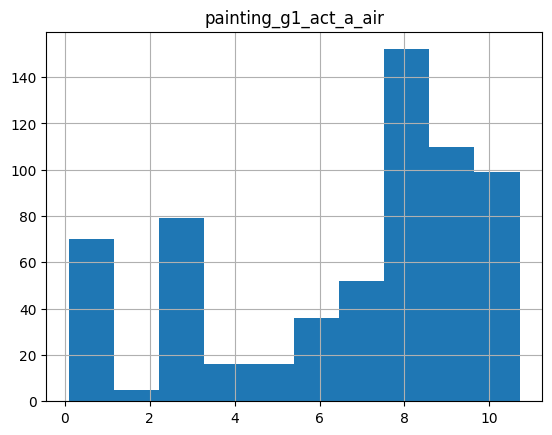

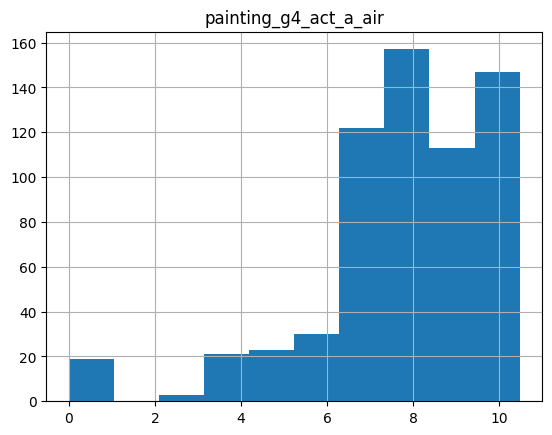

In [16]:
ndata = data #.fillna(0)
ndata.fillna(0).filter(regex='g1_act_a_air').hist()
ndata.fillna(0).filter(regex='g4_act_a_air').hist()
# ndata.filter(regex='painting').describe(include='all')
#(ndata.filter(regex='g4_') < 0.3).sum(axis=1)

### 結果
大部份工件經過 c_cols 數為 26 或 22 道，但還包括 23, 25, 24；
所有工件經過 o_cols 數都是 10 道；
大部份工件經過 p_cols 數為 50 道，但還包括 22-60 不等的程序數；
大部份工件經過 e_cols 數為 27 道，但還包括 21-28 不等的程序數；

### 猜想

1. 因為要預測膜厚度，painting 應該是影響最大的；oven 可能有溫度值，影響其次；然後可能是 env (不知是否環境因素)；clean 可能影響較小？  
2. 看起來缺失值可設為 0，對輸出影響較小。